# Deep Learning: Are we losing customers?
### Submitted By: Supriya Ramachandra

### Import libraries

In [259]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

### Class with function to load, preprocess and explore dataset

In [260]:
class data_preprocess:
    def __init__(self,file_name=None):
        self.file_name = file_name
    def load_data(self):
        customer_data = pd.read_csv(self.file_name)
        return customer_data
    def Xytable(self,customer_data):
        customer_data = customer_data.drop(['CustomerId','Surname'],axis=1)
        X=customer_data.iloc[:,:-1]
        y=customer_data.iloc[:,-1]
        return X,y
    def categorical_data(self,X):
        label1 = LabelEncoder()
        X['Geography'] = label1.fit_transform(X['Geography'])
        label = LabelEncoder()
        X['Gender'] = label.fit_transform(X['Gender'])
        X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
        return X
    def EDA(self,customer_data):
        print('customer_data shape',customer_data.shape)
        feature = customer_data.dtypes
        unique = customer_data.nunique()
        is_null = customer_data.isnull().sum()
        d_t = list(str(x) for x in feature[0:len(feature)])
        u_val = list(str(x) for x in unique[0:len(unique)])
        n_val =  list(str(x) for x in is_null[0:len(is_null)])
        eda = {'Features': feature.index,
                'data_types': d_t,
                'unique_feature_values' : u_val,
                'is_null' : n_val
                }
        EDA = pd.DataFrame(eda, columns = ['Features', 'data_types','unique_feature_values','is_null'])
        return EDA

### Read and load dataset into pandas dataframe 

In [261]:
file_name = "C:/Users/prati/OneDrive/Desktop/Sem 4/Deep Learning/Assignment 1/dataset.csv"
dp = data_preprocess(file_name)
customer_data = dp.load_data()

### Exploratory Data Analysis

In [262]:
eda = dp.EDA(customer_data)
print(eda)

customer_data shape (9000, 13)
           Features data_types unique_feature_values is_null
0        CustomerId      int64                  9000       0
1           Surname     object                  2784       0
2       CreditScore      int64                   459       0
3         Geography     object                     3       0
4            Gender     object                     2       0
5               Age      int64                    70       0
6            Tenure      int64                    11       0
7           Balance    float64                  5758       0
8     NumOfProducts      int64                     4       0
9         HasCrCard      int64                     2       0
10   IsActiveMember      int64                     2       0
11  EstimatedSalary    float64                  8999       0
12           Exited      int64                     2       0


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

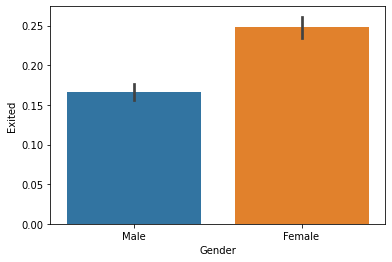

In [263]:
#Distribution of exited customers based on gender
sns.barplot(x='Gender', y='Exited', data=customer_data)

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

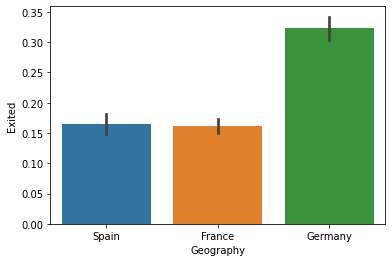

In [264]:
#Distribution of exited customers based on geography
sns.barplot(x='Geography', y='Exited', data=customer_data)

<AxesSubplot:xlabel='Age', ylabel='Exited'>

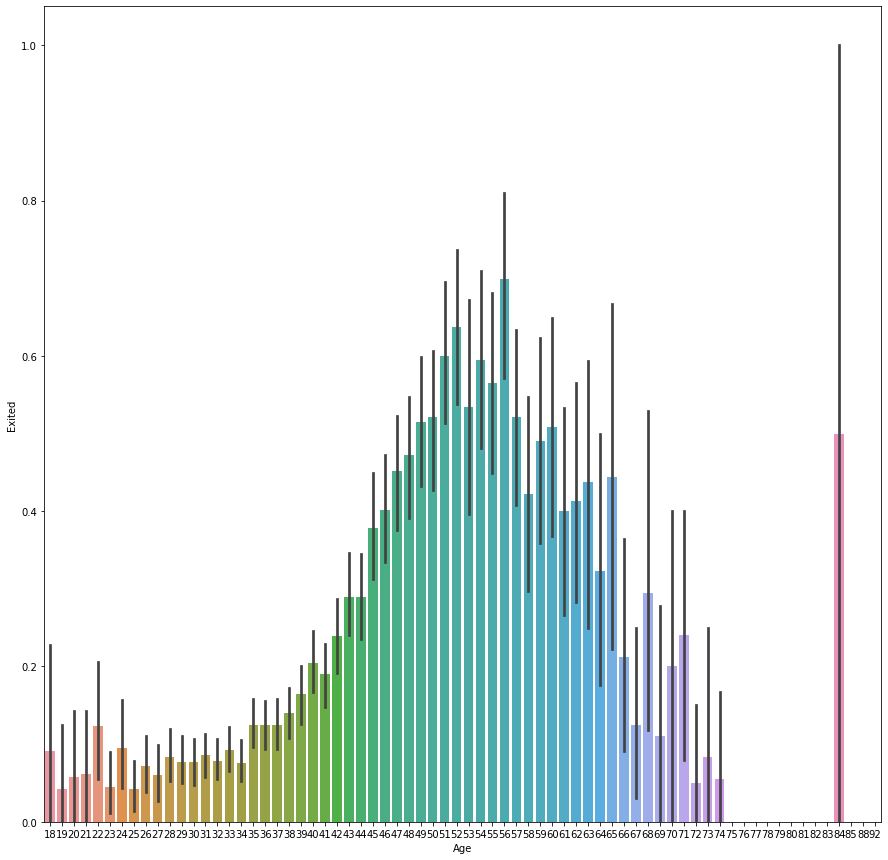

In [265]:
#Distribution of exited customers based on age
plt.figure(figsize=(15,15))
sns.barplot(x='Age', y='Exited', data=customer_data)

<AxesSubplot:ylabel='Density'>

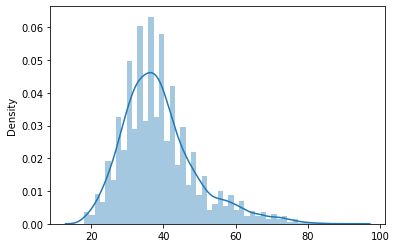

In [266]:
#Age distribution
sns.distplot(x=customer_data['Age'])

### Heatmap to show correlation between dataset features 

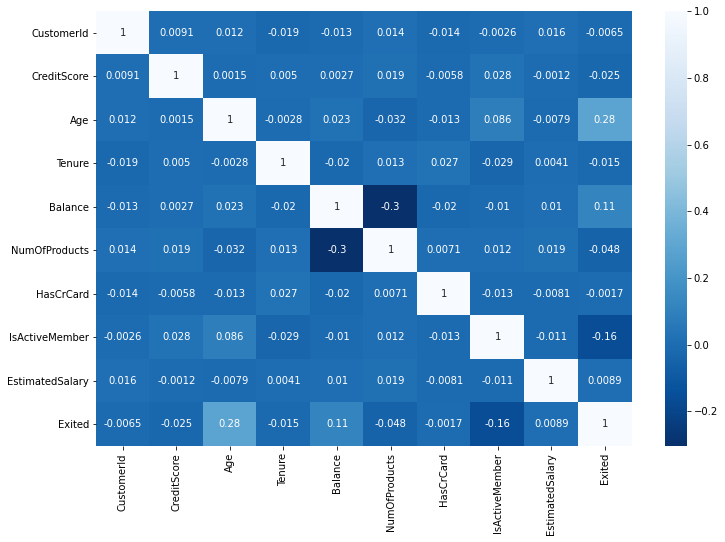

In [267]:
data_corr = customer_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr,cmap='Blues_r',annot=True)
plt.show()

In [268]:
X,y = dp.Xytable(customer_data)
X = dp.categorical_data(X)

### Feature Scaling and train test split

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [270]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_1',
       'Geography_2'],
      dtype='object')

In [271]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [272]:
X_train.shape[1]

11

### Artificial Neural Network Class with different configuration 

In [21]:
class Ann:
    #Ann1 has 3 hidden layer and one input & output layer
    def Ann1(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(5, input_dim=10, activation='relu'))
        model.add(Dense(4, input_dim=5, activation='relu'))
        model.add(Dense(1, input_dim=4, activation='sigmoid'))
        # compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit the model on the dataset
        model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=16, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        # evaluate the model
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_1.h5') #save trained model to run on judge dataset
    def Ann1_dropout(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11))) 
        model.add(Dense(5, input_dim=10, activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11))) 
        model.add(Dense(4, input_dim=5, activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11))) 
        model.add(Dense(1, input_dim=4, activation='sigmoid'))
        # compile model
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        # fit the model on the dataset
        model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        # evaluate the model
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_1_dropout.h5') #save trained model to run on judge dataset
    def Ann2(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(11, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(9, activation='relu'))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=100000, batch_size=16, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_2.h5') #save trained model to run on judge dataset
    def Ann3(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
        model.add(Dense(12, activation='relu',kernel_initializer='uniform'))
        model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=128, batch_size=10, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_3.h5') #save trained model to run on judge dataset
    def Ann4(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(24, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001)))
        model.add(Dense(24, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001)))
        model.add(Dense(24, activation='relu',kernel_initializer='uniform',kernel_regularizer=regularizers.l2(0.001)))
        model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=250, batch_size=16, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_4.h5') #save trained model to run on judge dataset
    def Ann5(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(24, activation='sigmoid'))
        model.add(Dense(12, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=250, batch_size=16, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_5.h5') #save trained model to run on judge dataset
    def Ann6(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(6, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=5, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_6.h5') #save trained model to run on judge dataset
    def Ann7(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(16, input_dim=11, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(4, activation='relu'))
        model.add(Dense(2, activation='relu'))
        model.add(Dense(1, activation='sigmoid',kernel_initializer="uniform"))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=10, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_7.h5') #save trained model to run on judge dataset
    def Ann8(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(16, input_dim=11, activation='relu'))
        model.add(Dense(1, activation='sigmoid',kernel_initializer="uniform"))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_8.h5') #save trained model to run on judge dataset
    def Ann9(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(6, input_dim=11, activation='tanh'))
        model.add(Dense(12, activation='tanh'))
        model.add(Dense(1, activation='relu'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=16, verbose=1)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_9.h5') #save trained model to run on judge dataset
    def Ann10(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11)))
        model.add(Dense(24, activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11)))
        model.add(Dense(12, activation='relu'))
        model.add(Dense(6, activation='relu'))
        model.add(Dense(3, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=150, batch_size=10, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_10.h5') #save trained model to run on judge dataset
    def Ann11(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(11, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(0.1,input_shape=(7200,11))) 
        model.add(Dense(9, activation='relu'))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=500, batch_size=10, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_11.h5') #save trained model to run on judge dataset
    def Ann12(self,X_train,y_train,X_test,y_test):
        model = Sequential()
        model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='softmax'))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=10, verbose=2)
        # Predict the training data
        predictions = model.predict(X_train) 
        # Plot the confusion matrix
        print(classification_report(y_train, np.round(predictions)))
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Accuracy: %.2f' % (accuracy*100))
        predicted_values = model.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, np.round(predicted_values)))
        print(classification_report(y_test, np.round(predicted_values)))
        model.save('ANN_model_12.h5') #save trained model to run on judge dataset

In [22]:
ann_model = Ann()

In [20]:
ann_model.Ann1(X_train,y_train,X_test,y_test)

Epoch 1/100
450/450 [==============================] - 1s 617us/step - loss: 0.5859 - accuracy: 0.7769
Epoch 2/100
450/450 [==============================] - 0s 607us/step - loss: 0.4548 - accuracy: 0.7934
Epoch 3/100
450/450 [==============================] - 0s 608us/step - loss: 0.4341 - accuracy: 0.7967
Epoch 4/100
450/450 [==============================] - 0s 598us/step - loss: 0.4209 - accuracy: 0.7980
Epoch 5/100
450/450 [==============================] - 0s 615us/step - loss: 0.4102 - accuracy: 0.8057
Epoch 6/100
450/450 [==============================] - 0s 626us/step - loss: 0.4144 - accuracy: 0.8235
Epoch 7/100
450/450 [==============================] - 0s 606us/step - loss: 0.4009 - accuracy: 0.8282
Epoch 8/100
450/450 [==============================] - 0s 597us/step - loss: 0.3950 - accuracy: 0.8356
Epoch 9/100
450/450 [==============================] - 0s 628us/step - loss: 0.3820 - accuracy: 0.8393
Epoch 10/100
450/450 [==============================] - 0s 607us/step - l

In [32]:
ann_model.Ann1_dropout(X_train,y_train,X_test,y_test)

Epoch 1/100
720/720 [==============================] - 1s 551us/step - loss: 0.6211 - accuracy: 0.6901
Epoch 2/100
720/720 [==============================] - 0s 529us/step - loss: 0.5030 - accuracy: 0.7947
Epoch 3/100
720/720 [==============================] - 0s 539us/step - loss: 0.4823 - accuracy: 0.7948
Epoch 4/100
720/720 [==============================] - 0s 557us/step - loss: 0.4638 - accuracy: 0.7914
Epoch 5/100
720/720 [==============================] - 0s 551us/step - loss: 0.4737 - accuracy: 0.7863
Epoch 6/100
720/720 [==============================] - 0s 537us/step - loss: 0.4423 - accuracy: 0.8019
Epoch 7/100
720/720 [==============================] - 0s 551us/step - loss: 0.4456 - accuracy: 0.7947
Epoch 8/100
720/720 [==============================] - 0s 557us/step - loss: 0.4299 - accuracy: 0.8063
Epoch 9/100
720/720 [==============================] - 0s 536us/step - loss: 0.4288 - accuracy: 0.8115
Epoch 10/100
720/720 [==============================] - 0s 568us/step - l

In [35]:
ann_model.Ann3(X_train,y_train,X_test,y_test)

Epoch 1/128
720/720 - 1s - loss: 0.4692 - accuracy: 0.7964
Epoch 2/128
720/720 - 0s - loss: 0.4228 - accuracy: 0.7965
Epoch 3/128
720/720 - 0s - loss: 0.4165 - accuracy: 0.8183
Epoch 4/128
720/720 - 0s - loss: 0.4141 - accuracy: 0.8325
Epoch 5/128
720/720 - 0s - loss: 0.4115 - accuracy: 0.8326
Epoch 6/128
720/720 - 0s - loss: 0.4100 - accuracy: 0.8376
Epoch 7/128
720/720 - 0s - loss: 0.4079 - accuracy: 0.8369
Epoch 8/128
720/720 - 0s - loss: 0.4075 - accuracy: 0.8394
Epoch 9/128
720/720 - 0s - loss: 0.4064 - accuracy: 0.8364
Epoch 10/128
720/720 - 0s - loss: 0.4050 - accuracy: 0.8381
Epoch 11/128
720/720 - 0s - loss: 0.4041 - accuracy: 0.8397
Epoch 12/128
720/720 - 0s - loss: 0.4037 - accuracy: 0.8381
Epoch 13/128
720/720 - 0s - loss: 0.4031 - accuracy: 0.8357
Epoch 14/128
720/720 - 0s - loss: 0.4027 - accuracy: 0.8396
Epoch 15/128
720/720 - 0s - loss: 0.4014 - accuracy: 0.8386
Epoch 16/128
720/720 - 0s - loss: 0.4014 - accuracy: 0.8390
Epoch 17/128
720/720 - 0s - loss: 0.4009 - accura

In [38]:
ann_model.Ann4(X_train,y_train,X_test,y_test)

Epoch 1/250
450/450 - 1s - loss: 0.4772 - accuracy: 0.7949
Epoch 2/250
450/450 - 0s - loss: 0.4297 - accuracy: 0.7965
Epoch 3/250
450/450 - 0s - loss: 0.4239 - accuracy: 0.8199
Epoch 4/250
450/450 - 0s - loss: 0.4222 - accuracy: 0.8311
Epoch 5/250
450/450 - 0s - loss: 0.4201 - accuracy: 0.8321
Epoch 6/250
450/450 - 0s - loss: 0.4182 - accuracy: 0.8328
Epoch 7/250
450/450 - 0s - loss: 0.4175 - accuracy: 0.8335
Epoch 8/250
450/450 - 0s - loss: 0.4164 - accuracy: 0.8332
Epoch 9/250
450/450 - 0s - loss: 0.4150 - accuracy: 0.8371
Epoch 10/250
450/450 - 0s - loss: 0.4154 - accuracy: 0.8344
Epoch 11/250
450/450 - 0s - loss: 0.4142 - accuracy: 0.8379
Epoch 12/250
450/450 - 0s - loss: 0.4134 - accuracy: 0.8378
Epoch 13/250
450/450 - 0s - loss: 0.4129 - accuracy: 0.8372
Epoch 14/250
450/450 - 0s - loss: 0.4115 - accuracy: 0.8378
Epoch 15/250
450/450 - 0s - loss: 0.4121 - accuracy: 0.8360
Epoch 16/250
450/450 - 0s - loss: 0.4116 - accuracy: 0.8372
Epoch 17/250
450/450 - 0s - loss: 0.4111 - accura

450/450 - 0s - loss: 0.3401 - accuracy: 0.8674
Epoch 138/250
450/450 - 0s - loss: 0.3406 - accuracy: 0.8674
Epoch 139/250
450/450 - 0s - loss: 0.3413 - accuracy: 0.8649
Epoch 140/250
450/450 - 0s - loss: 0.3410 - accuracy: 0.8661
Epoch 141/250
450/450 - 0s - loss: 0.3404 - accuracy: 0.8660
Epoch 142/250
450/450 - 0s - loss: 0.3408 - accuracy: 0.8671
Epoch 143/250
450/450 - 0s - loss: 0.3404 - accuracy: 0.8637
Epoch 144/250
450/450 - 0s - loss: 0.3387 - accuracy: 0.8672
Epoch 145/250
450/450 - 0s - loss: 0.3407 - accuracy: 0.8664
Epoch 146/250
450/450 - 0s - loss: 0.3400 - accuracy: 0.8653
Epoch 147/250
450/450 - 0s - loss: 0.3403 - accuracy: 0.8669
Epoch 148/250
450/450 - 0s - loss: 0.3406 - accuracy: 0.8657
Epoch 149/250
450/450 - 0s - loss: 0.3393 - accuracy: 0.8654
Epoch 150/250
450/450 - 0s - loss: 0.3392 - accuracy: 0.8651
Epoch 151/250
450/450 - 0s - loss: 0.3402 - accuracy: 0.8672
Epoch 152/250
450/450 - 0s - loss: 0.3410 - accuracy: 0.8639
Epoch 153/250
450/450 - 0s - loss: 0.3

In [39]:
ann_model.Ann5(X_train,y_train,X_test,y_test)

Epoch 1/250
450/450 - 1s - loss: 0.5205 - accuracy: 0.7840
Epoch 2/250
450/450 - 0s - loss: 0.4360 - accuracy: 0.7965
Epoch 3/250
450/450 - 0s - loss: 0.4111 - accuracy: 0.7965
Epoch 4/250
450/450 - 0s - loss: 0.3913 - accuracy: 0.7965
Epoch 5/250
450/450 - 0s - loss: 0.3799 - accuracy: 0.7979
Epoch 6/250
450/450 - 0s - loss: 0.3727 - accuracy: 0.8392
Epoch 7/250
450/450 - 0s - loss: 0.3676 - accuracy: 0.8494
Epoch 8/250
450/450 - 0s - loss: 0.3629 - accuracy: 0.8564
Epoch 9/250
450/450 - 0s - loss: 0.3584 - accuracy: 0.8576
Epoch 10/250
450/450 - 0s - loss: 0.3545 - accuracy: 0.8601
Epoch 11/250
450/450 - 0s - loss: 0.3514 - accuracy: 0.8586
Epoch 12/250
450/450 - 0s - loss: 0.3479 - accuracy: 0.8624
Epoch 13/250
450/450 - 0s - loss: 0.3436 - accuracy: 0.8628
Epoch 14/250
450/450 - 0s - loss: 0.3430 - accuracy: 0.8635
Epoch 15/250
450/450 - 0s - loss: 0.3398 - accuracy: 0.8635
Epoch 16/250
450/450 - 0s - loss: 0.3378 - accuracy: 0.8640
Epoch 17/250
450/450 - 0s - loss: 0.3353 - accura

450/450 - 0s - loss: 0.2496 - accuracy: 0.8969
Epoch 138/250
450/450 - 0s - loss: 0.2483 - accuracy: 0.8982
Epoch 139/250
450/450 - 0s - loss: 0.2477 - accuracy: 0.8978
Epoch 140/250
450/450 - 0s - loss: 0.2462 - accuracy: 0.8990
Epoch 141/250
450/450 - 0s - loss: 0.2458 - accuracy: 0.8969
Epoch 142/250
450/450 - 0s - loss: 0.2463 - accuracy: 0.8989
Epoch 143/250
450/450 - 0s - loss: 0.2444 - accuracy: 0.9006
Epoch 144/250
450/450 - 0s - loss: 0.2433 - accuracy: 0.8999
Epoch 145/250
450/450 - 0s - loss: 0.2420 - accuracy: 0.9007
Epoch 146/250
450/450 - 0s - loss: 0.2416 - accuracy: 0.8988
Epoch 147/250
450/450 - 0s - loss: 0.2418 - accuracy: 0.8993
Epoch 148/250
450/450 - 0s - loss: 0.2415 - accuracy: 0.8989
Epoch 149/250
450/450 - 0s - loss: 0.2396 - accuracy: 0.8989
Epoch 150/250
450/450 - 0s - loss: 0.2400 - accuracy: 0.8986
Epoch 151/250
450/450 - 0s - loss: 0.2396 - accuracy: 0.8985
Epoch 152/250
450/450 - 0s - loss: 0.2378 - accuracy: 0.9029
Epoch 153/250
450/450 - 0s - loss: 0.2

In [40]:
ann_model.Ann6(X_train,y_train,X_test,y_test)

Epoch 1/100
1440/1440 [==============================] - 1s 555us/step - loss: 0.5347 - accuracy: 0.7985
Epoch 2/100
1440/1440 [==============================] - 1s 573us/step - loss: 0.4593 - accuracy: 0.7921
Epoch 3/100
1440/1440 [==============================] - 1s 562us/step - loss: 0.4277 - accuracy: 0.7956
Epoch 4/100
1440/1440 [==============================] - 1s 568us/step - loss: 0.4042 - accuracy: 0.8039
Epoch 5/100
1440/1440 [==============================] - 1s 551us/step - loss: 0.3870 - accuracy: 0.8258
Epoch 6/100
1440/1440 [==============================] - 1s 549us/step - loss: 0.3754 - accuracy: 0.8421
Epoch 7/100
1440/1440 [==============================] - 1s 559us/step - loss: 0.3650 - accuracy: 0.8547
Epoch 8/100
1440/1440 [==============================] - 1s 580us/step - loss: 0.3613 - accuracy: 0.8546
Epoch 9/100
1440/1440 [==============================] - 1s 566us/step - loss: 0.3450 - accuracy: 0.8638
Epoch 10/100
1440/1440 [==============================]

In [41]:
ann_model.Ann7(X_train,y_train,X_test,y_test)

Epoch 1/50
720/720 [==============================] - 1s 573us/step - loss: 0.5957 - accuracy: 0.7781
Epoch 2/50
720/720 [==============================] - 0s 562us/step - loss: 0.5001 - accuracy: 0.7963
Epoch 3/50
720/720 [==============================] - 0s 585us/step - loss: 0.4889 - accuracy: 0.7994
Epoch 4/50
720/720 [==============================] - 0s 557us/step - loss: 0.4753 - accuracy: 0.7948
Epoch 5/50
720/720 [==============================] - 0s 552us/step - loss: 0.4571 - accuracy: 0.7948
Epoch 6/50
720/720 [==============================] - 0s 557us/step - loss: 0.4391 - accuracy: 0.7951
Epoch 7/50
720/720 [==============================] - 0s 563us/step - loss: 0.4188 - accuracy: 0.7990
Epoch 8/50
720/720 [==============================] - 0s 571us/step - loss: 0.4147 - accuracy: 0.7940
Epoch 9/50
720/720 [==============================] - 0s 551us/step - loss: 0.3993 - accuracy: 0.8029
Epoch 10/50
720/720 [==============================] - 0s 568us/step - loss: 0.397

In [45]:
ann_model.Ann8(X_train,y_train,X_test,y_test)

Epoch 1/100
720/720 [==============================] - 1s 518us/step - loss: 0.5569 - accuracy: 0.7861
Epoch 2/100
720/720 [==============================] - 0s 519us/step - loss: 0.4596 - accuracy: 0.8015
Epoch 3/100
720/720 [==============================] - 0s 531us/step - loss: 0.4479 - accuracy: 0.7992
Epoch 4/100
720/720 [==============================] - 0s 518us/step - loss: 0.4428 - accuracy: 0.8051
Epoch 5/100
720/720 [==============================] - 0s 534us/step - loss: 0.4190 - accuracy: 0.8220
Epoch 6/100
720/720 [==============================] - 0s 531us/step - loss: 0.4173 - accuracy: 0.8208
Epoch 7/100
720/720 [==============================] - 0s 555us/step - loss: 0.4247 - accuracy: 0.8258
Epoch 8/100
720/720 [==============================] - 0s 526us/step - loss: 0.4097 - accuracy: 0.8283
Epoch 9/100
720/720 [==============================] - 0s 526us/step - loss: 0.4147 - accuracy: 0.8246
Epoch 10/100
720/720 [==============================] - 0s 538us/step - l

In [69]:
ann_model.Ann8(X_train,y_train,X_test,y_test)

Epoch 1/100
720/720 [==============================] - 1s 524us/step - loss: 0.5537 - accuracy: 0.7958
Epoch 2/100
720/720 [==============================] - 0s 518us/step - loss: 0.4681 - accuracy: 0.7960
Epoch 3/100
720/720 [==============================] - 0s 545us/step - loss: 0.4321 - accuracy: 0.8121
Epoch 4/100
720/720 [==============================] - 0s 528us/step - loss: 0.4310 - accuracy: 0.8086
Epoch 5/100
720/720 [==============================] - 0s 528us/step - loss: 0.4281 - accuracy: 0.8143
Epoch 6/100
720/720 [==============================] - 0s 536us/step - loss: 0.4201 - accuracy: 0.8157
Epoch 7/100
720/720 [==============================] - 0s 523us/step - loss: 0.4144 - accuracy: 0.8211
Epoch 8/100
720/720 [==============================] - 0s 553us/step - loss: 0.4115 - accuracy: 0.8195
Epoch 9/100
720/720 [==============================] - 0s 544us/step - loss: 0.4156 - accuracy: 0.8238
Epoch 10/100
720/720 [==============================] - 0s 529us/step - l

In [101]:
ann_model.Ann9(X_train,y_train,X_test,y_test)

Epoch 1/50
450/450 [==============================] - 1s 584us/step - loss: 1.3892 - accuracy: 0.7541
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.76 - 0s 587us/step - loss: 0.6551 - accuracy: 0.7701
Epoch 3/50
450/450 [==============================] - 0s 609us/step - loss: 0.5224 - accuracy: 0.7794
Epoch 4/50
450/450 [==============================] - 0s 562us/step - loss: 0.7280 - accuracy: 0.5822
Epoch 5/50
450/450 [==============================] - 0s 621us/step - loss: 0.7070 - accuracy: 0.6003
Epoch 6/50
450/450 [==============================] - 0s 569us/step - loss: 0.6912 - accuracy: 0.6048
Epoch 7/50
450/450 [==============================] - 0s 605us/step - loss: 0.6723 - accuracy: 0.6263
Epoch 8/50
450/450 [==============================] - 0s 581us/step - loss: 0.6647 - accuracy: 0.6365
Epoch 9/50
450/450 [==============================] - 0s 587us/step - loss: 0.6441 - accuracy: 0.6608
Epoch 10/50
450/450 [===================

In [72]:
ann_model.Ann10(X_train,y_train,X_test,y_test)

Epoch 1/150
720/720 - 1s - loss: 0.4533 - accuracy: 0.7943
Epoch 2/150
720/720 - 0s - loss: 0.4059 - accuracy: 0.8294
Epoch 3/150
720/720 - 0s - loss: 0.3812 - accuracy: 0.8447
Epoch 4/150
720/720 - 0s - loss: 0.3637 - accuracy: 0.8489
Epoch 5/150
720/720 - 0s - loss: 0.3608 - accuracy: 0.8511
Epoch 6/150
720/720 - 0s - loss: 0.3536 - accuracy: 0.8572
Epoch 7/150
720/720 - 0s - loss: 0.3495 - accuracy: 0.8587
Epoch 8/150
720/720 - 0s - loss: 0.3473 - accuracy: 0.8624
Epoch 9/150
720/720 - 0s - loss: 0.3462 - accuracy: 0.8582
Epoch 10/150
720/720 - 0s - loss: 0.3408 - accuracy: 0.8606
Epoch 11/150
720/720 - 0s - loss: 0.3348 - accuracy: 0.8649
Epoch 12/150
720/720 - 0s - loss: 0.3341 - accuracy: 0.8635
Epoch 13/150
720/720 - 0s - loss: 0.3357 - accuracy: 0.8653
Epoch 14/150
720/720 - 0s - loss: 0.3328 - accuracy: 0.8637
Epoch 15/150
720/720 - 0s - loss: 0.3375 - accuracy: 0.8637
Epoch 16/150
720/720 - 0s - loss: 0.3325 - accuracy: 0.8667
Epoch 17/150
720/720 - 0s - loss: 0.3308 - accura

720/720 - 0s - loss: 0.2793 - accuracy: 0.8890
Epoch 138/150
720/720 - 0s - loss: 0.2811 - accuracy: 0.8896
Epoch 139/150
720/720 - 0s - loss: 0.2818 - accuracy: 0.8879
Epoch 140/150
720/720 - 0s - loss: 0.2781 - accuracy: 0.8914
Epoch 141/150
720/720 - 0s - loss: 0.2801 - accuracy: 0.8897
Epoch 142/150
720/720 - 0s - loss: 0.2770 - accuracy: 0.8888
Epoch 143/150
720/720 - 0s - loss: 0.2796 - accuracy: 0.8915
Epoch 144/150
720/720 - 0s - loss: 0.2815 - accuracy: 0.8894
Epoch 145/150
720/720 - 0s - loss: 0.2739 - accuracy: 0.8929
Epoch 146/150
720/720 - 0s - loss: 0.2781 - accuracy: 0.8878
Epoch 147/150
720/720 - 0s - loss: 0.2732 - accuracy: 0.8918
Epoch 148/150
720/720 - 0s - loss: 0.2713 - accuracy: 0.8918
Epoch 149/150
720/720 - 0s - loss: 0.2772 - accuracy: 0.8926
Epoch 150/150
720/720 - 0s - loss: 0.2757 - accuracy: 0.8896
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5735
           1       0.88      0.65      0.75      14

In [33]:
ann_model.Ann11(X_train,y_train,X_test,y_test)

Epoch 1/500
720/720 - 1s - loss: 0.5734 - accuracy: 0.7221
Epoch 2/500
720/720 - 0s - loss: 0.5064 - accuracy: 0.7965
Epoch 3/500
720/720 - 0s - loss: 0.5057 - accuracy: 0.7965
Epoch 4/500
720/720 - 0s - loss: 0.5056 - accuracy: 0.7965
Epoch 5/500
720/720 - 0s - loss: 0.5055 - accuracy: 0.7965
Epoch 6/500
720/720 - 0s - loss: 0.5053 - accuracy: 0.7965
Epoch 7/500
720/720 - 0s - loss: 0.5052 - accuracy: 0.7965
Epoch 8/500
720/720 - 0s - loss: 0.5052 - accuracy: 0.7965
Epoch 9/500
720/720 - 0s - loss: 0.5050 - accuracy: 0.7965
Epoch 10/500
720/720 - 0s - loss: 0.5048 - accuracy: 0.7965
Epoch 11/500
720/720 - 0s - loss: 0.5047 - accuracy: 0.7965
Epoch 12/500
720/720 - 0s - loss: 0.5045 - accuracy: 0.7965
Epoch 13/500
720/720 - 0s - loss: 0.5041 - accuracy: 0.7965
Epoch 14/500
720/720 - 0s - loss: 0.5037 - accuracy: 0.7965
Epoch 15/500
720/720 - 0s - loss: 0.5030 - accuracy: 0.7965
Epoch 16/500
720/720 - 0s - loss: 0.5023 - accuracy: 0.7965
Epoch 17/500
720/720 - 0s - loss: 0.5010 - accura

720/720 - 0s - loss: 0.3378 - accuracy: 0.8589
Epoch 138/500
720/720 - 0s - loss: 0.3381 - accuracy: 0.8618
Epoch 139/500
720/720 - 0s - loss: 0.3379 - accuracy: 0.8636
Epoch 140/500
720/720 - 0s - loss: 0.3350 - accuracy: 0.8647
Epoch 141/500
720/720 - 0s - loss: 0.3389 - accuracy: 0.8612
Epoch 142/500
720/720 - 0s - loss: 0.3385 - accuracy: 0.8624
Epoch 143/500
720/720 - 0s - loss: 0.3394 - accuracy: 0.8619
Epoch 144/500
720/720 - 0s - loss: 0.3322 - accuracy: 0.8656
Epoch 145/500
720/720 - 0s - loss: 0.3381 - accuracy: 0.8606
Epoch 146/500
720/720 - 0s - loss: 0.3355 - accuracy: 0.8614
Epoch 147/500
720/720 - 0s - loss: 0.3373 - accuracy: 0.8631
Epoch 148/500
720/720 - 0s - loss: 0.3366 - accuracy: 0.8612
Epoch 149/500
720/720 - 0s - loss: 0.3338 - accuracy: 0.8631
Epoch 150/500
720/720 - 0s - loss: 0.3334 - accuracy: 0.8647
Epoch 151/500
720/720 - 0s - loss: 0.3393 - accuracy: 0.8617
Epoch 152/500
720/720 - 0s - loss: 0.3364 - accuracy: 0.8646
Epoch 153/500
720/720 - 0s - loss: 0.3

Epoch 272/500
720/720 - 0s - loss: 0.3304 - accuracy: 0.8636
Epoch 273/500
720/720 - 0s - loss: 0.3291 - accuracy: 0.8639
Epoch 274/500
720/720 - 0s - loss: 0.3273 - accuracy: 0.8629
Epoch 275/500
720/720 - 0s - loss: 0.3300 - accuracy: 0.8636
Epoch 276/500
720/720 - 0s - loss: 0.3291 - accuracy: 0.8656
Epoch 277/500
720/720 - 0s - loss: 0.3266 - accuracy: 0.8647
Epoch 278/500
720/720 - 0s - loss: 0.3280 - accuracy: 0.8664
Epoch 279/500
720/720 - 0s - loss: 0.3297 - accuracy: 0.8632
Epoch 280/500
720/720 - 0s - loss: 0.3288 - accuracy: 0.8654
Epoch 281/500
720/720 - 0s - loss: 0.3288 - accuracy: 0.8635
Epoch 282/500
720/720 - 0s - loss: 0.3244 - accuracy: 0.8682
Epoch 283/500
720/720 - 0s - loss: 0.3273 - accuracy: 0.8664
Epoch 284/500
720/720 - 0s - loss: 0.3320 - accuracy: 0.8619
Epoch 285/500
720/720 - 0s - loss: 0.3274 - accuracy: 0.8644
Epoch 286/500
720/720 - 0s - loss: 0.3252 - accuracy: 0.8676
Epoch 287/500
720/720 - 0s - loss: 0.3292 - accuracy: 0.8653
Epoch 288/500
720/720 - 

Epoch 407/500
720/720 - 0s - loss: 0.3254 - accuracy: 0.8644
Epoch 408/500
720/720 - 0s - loss: 0.3244 - accuracy: 0.8654
Epoch 409/500
720/720 - 0s - loss: 0.3249 - accuracy: 0.8629
Epoch 410/500
720/720 - 0s - loss: 0.3216 - accuracy: 0.8674
Epoch 411/500
720/720 - 0s - loss: 0.3247 - accuracy: 0.8672
Epoch 412/500
720/720 - 0s - loss: 0.3225 - accuracy: 0.8650
Epoch 413/500
720/720 - 0s - loss: 0.3227 - accuracy: 0.8682
Epoch 414/500
720/720 - 0s - loss: 0.3240 - accuracy: 0.8643
Epoch 415/500
720/720 - 0s - loss: 0.3234 - accuracy: 0.8687
Epoch 416/500
720/720 - 0s - loss: 0.3255 - accuracy: 0.8662
Epoch 417/500
720/720 - 0s - loss: 0.3236 - accuracy: 0.8669
Epoch 418/500
720/720 - 0s - loss: 0.3228 - accuracy: 0.8672
Epoch 419/500
720/720 - 0s - loss: 0.3208 - accuracy: 0.8683
Epoch 420/500
720/720 - 0s - loss: 0.3243 - accuracy: 0.8676
Epoch 421/500
720/720 - 0s - loss: 0.3238 - accuracy: 0.8660
Epoch 422/500
720/720 - 0s - loss: 0.3220 - accuracy: 0.8672
Epoch 423/500
720/720 - 

In [23]:
ann_model.Ann12(X_train,y_train,X_test,y_test)

Epoch 1/50
720/720 - 0s - loss: 0.4993 - accuracy: 0.2035
Epoch 2/50
720/720 - 0s - loss: 0.4518 - accuracy: 0.2035
Epoch 3/50
720/720 - 0s - loss: 0.4344 - accuracy: 0.2035
Epoch 4/50
720/720 - 0s - loss: 0.4260 - accuracy: 0.2035
Epoch 5/50
720/720 - 0s - loss: 0.4193 - accuracy: 0.2035
Epoch 6/50
720/720 - 0s - loss: 0.4134 - accuracy: 0.2035
Epoch 7/50
720/720 - 0s - loss: 0.4067 - accuracy: 0.2035
Epoch 8/50
720/720 - 0s - loss: 0.3991 - accuracy: 0.2035
Epoch 9/50
720/720 - 0s - loss: 0.3916 - accuracy: 0.2035
Epoch 10/50
720/720 - 0s - loss: 0.3848 - accuracy: 0.2035
Epoch 11/50
720/720 - 0s - loss: 0.3778 - accuracy: 0.2035
Epoch 12/50
720/720 - 0s - loss: 0.3734 - accuracy: 0.2035
Epoch 13/50
720/720 - 0s - loss: 0.3692 - accuracy: 0.2035
Epoch 14/50
720/720 - 0s - loss: 0.3654 - accuracy: 0.2035
Epoch 15/50
720/720 - 0s - loss: 0.3629 - accuracy: 0.2035
Epoch 16/50
720/720 - 0s - loss: 0.3604 - accuracy: 0.2035
Epoch 17/50
720/720 - 0s - loss: 0.3586 - accuracy: 0.2035
Epoch 

C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5735
           1       0.20      1.00      0.34      1465

    accuracy                           0.20      7200
   macro avg       0.10      0.50      0.17      7200
weighted avg       0.04      0.20      0.07      7200

Accuracy: 20.33
Accuracy: 0.20333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1434
           1       0.20      1.00      0.34       366

    accuracy                           0.20      1800
   macro avg       0.10      0.50      0.17      1800
weighted avg       0.04      0.20      0.07      1800



C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ANN implemented from scratch 

### Define the neural network architecture, I have used list of dictionaries to store hidden layers details

In [273]:
hidden_layers = [{"input_d": X_train.shape[1], "output_d": 11, "activation": "relu"}, 
                 {"input_d": 11, "output_d": 9, "activation": "relu"},{"input_d": 9, "output_d": 5, "activation": "relu"},
    {"input_d": 5, "output_d": 3, "activation": "relu"},{"input_d": 3, "output_d": 1, "activation": "sigmoid"}]

"""hidden_layers = [{"input_d": X_train.shape[1], "output_d": 11, "activation": "relu"}, {"input_d": 11, "output_d": 5, 
                    "activation": "relu"},{"input_d": 5, "output_d": 1, "activation": "sigmoid"}]"""

'hidden_layers = [{"input_d": X_train.shape[1], "output_d": 11, "activation": "relu"}, {"input_d": 11, "output_d": 5, \n                    "activation": "relu"},{"input_d": 5, "output_d": 1, "activation": "sigmoid"}]'

### Function to find sigmoid, relu of a value and its corresponding derivatives 

In [274]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def relu(z):
    return np.maximum(0,z)
def sigmoid_derivative(z): 
    return sigmoid(z) * (1 - sigmoid(z))
def relu_derivative(z):
    return z>0

### Binary Cross Entropy

In [275]:
def binary_cross_entropy(y_hat, y):
    m = y_hat.shape[1]
    #print('y shape',y_hat.shape,y.shape)
    cost = -1 / m * (np.dot(y, np.log(y_hat).T) + np.dot(1 - y, np.log(1 - y_hat).T))
    return np.squeeze(cost)

### function to initialize neural networks weights and biases 

In [276]:
def initialize_weightsBias(hidden_layers, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(hidden_layers)
    param_values = {}
    # iteration over network layers
    for i, layer in enumerate(hidden_layers):
        layer_i = i + 1
        layer_input_size = layer["input_d"]
        layer_output_size = layer["output_d"]
        param_values['W' + str(layer_i)] = np.random.randn(layer_output_size, layer_input_size)*0.1
        param_values['b' + str(layer_i)] = np.random.randn(layer_output_size, 1)*0.1
    return param_values

### Activation of current layer 

In [315]:
def forward_activation_layer(X, W, b, activation="relu"):
    Z = np.dot(W, X) + b
    #print('Z shape',Z.shape)
    if activation == "relu":
        activation_function = relu
    elif activation == "sigmoid":
        activation_function = sigmoid
    else:
        print('wrong activation')
    return activation_function(Z), Z

### Forward propogation of the Neural Network 

In [316]:
def forward_propagation(X, params_values,hidden_layers):
    dic_A_Z = {}
    X_current = X
    for i, layer in enumerate(hidden_layers):
        layer_i = i + 1
        #print('layer',layer_i)
        X_prev = X_current
        current_activation = layer["activation"]
        Weight_curr = params_values["W" + str(layer_i)]
        #print(j, j_b)
        #print(Weight_curr.shape, Weight_curr)
        bias_curr = params_values["b" + str(layer_i)]
        X_current, Z_current = forward_activation_layer(X_prev, Weight_curr, bias_curr, current_activation)
        #print('y aht,z',X_current.shape,Z_current.shape)
        dic_A_Z["A" + str(i)] = X_prev
        dic_A_Z["Z" + str(layer_i)] = Z_current
        #print(X_current)
    return X_current, dic_A_Z

### Derivative to find weights and biases to minimize cost function 

In [317]:
def derivative_backward_propagation(dA_c, W_c, b_c, Z_c, A_prev, activation):
    m = A_prev.shape[1]
    if activation == "relu":
        backward_activation_func = relu_derivative
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_derivative
    else:
        raise Exception('Non-supported activation function')
    
    #dZ_c = backward_activation_func(dA_c, Z_c)
    dZ_c = backward_activation_func(dA_c)
    dW_c = 1/m * np.dot(dZ_c, A_prev.T) 
    db_c = 1/m * np.sum(dZ_c, axis=1, keepdims=True) 
    dA_prev = np.dot(W_c.T, dZ_c)
    return dA_prev, dW_c, db_c

### Backward Propogation of Neural Network 

In [318]:
def backward_propagation(y_hat, y, memory, params_values, hidden_layers):
    gradient_values = {}
    m = y.shape[1]
    y = y.reshape(y_hat.shape)
    #print('y reshape',y.shape)
    dA_prev = - (np.divide(y, y_hat) - np.divide(1 - y, 1 - y_hat))
    #dA_prev = np.subtract(y,y_hat)
    #print('y-yhat',np.subtract(y,y_hat))
    #dA_prev = binary_cross_entropy(y_hat,y)
    #print('cost daprev',dA_prev)
    for layer_i_prev, layer in reversed(list(enumerate(hidden_layers))):
        layer_i_curr = layer_i_prev + 1
        activ_function_curr = layer["activation"]
        dA_c = dA_prev
        A_prev = memory["A" + str(layer_i_prev)]
        Z_c = memory["Z" + str(layer_i_curr)]
        W_c = params_values["W" + str(layer_i_curr)]
        b_c = params_values["b" + str(layer_i_curr)]
        dA_prev, dW_c, db_c = derivative_backward_propagation(dA_c, W_c, b_c, Z_c, A_prev, activ_function_curr)
        gradient_values["dW" + str(layer_i_curr)] = dW_c
        gradient_values["db" + str(layer_i_curr)] = db_c
    return gradient_values

### Update cost and bias values 

In [319]:
def update_weightBias(params_values, gradient_values, hidden_layers, learning_rate):
    #for i, layer in enumerate(hidden_layers, 1):
    for i in range(len(hidden_layers)):
        params_values["W" + str(i+1)] -= learning_rate * gradient_values["dW" + str(i+1)]        
        params_values["b" + str(i+1)] -= learning_rate * gradient_values["db" + str(i+1)]
    return params_values

### Prediction Function 1 or 0

In [320]:
def prediction(binary_prob):
    probability = np.copy(binary_prob)
    probability[probability >= 0.5] = 1
    probability[probability < 0.5] = 0
    return probability

### Accuracy calculation

In [321]:
def accuracy_value(y_hat, y):
    y_hat_ = prediction(y_hat)
    #print(y_hat_,'y',y)
    #accuracy = np.sum(np.argmax(y_hat, 0) == y) * 100 / y.size
    accuracy = (y_hat_ == y).all(axis=(0)).mean()
    return accuracy

### Function to train the neural network 

In [322]:
def train(X, y, hidden_layers, epochs, learning_rate):
    params_values = initialize_weightsBias(hidden_layers, 99)    
    #print(params_values)
    cost_cache = []
    accuracy_cache = []
    batch_size=64
    for i in range(epochs):
        j=0
        #print(len(y[0]))
        while j<len(y[0]):
            X_batch = X[:,:j+batch_size]
            y_batch = y[:,:j+batch_size]      
            y_hat, info = forward_propagation(X_batch, params_values, hidden_layers)
            #print(y_hat)
            #print('xy',X_batch.shape,y_batch.shape)
            cost = binary_cross_entropy(y_hat, y_batch)
            #print(cost)
            cost_cache.append(cost)
            accuracy = accuracy_value(y_hat, y_batch)
            accuracy_cache.append(accuracy)
            gradient_values = backward_propagation(y_hat, y_batch, info, params_values, hidden_layers)
            params_values = update_weightBias(params_values, gradient_values, hidden_layers, learning_rate)   
            j=j+batch_size
        if i % 10 == 0:
            print("{}/{}: cost ={}% accuracy = {}%".format(i, epochs, cost_cache[-1],accuracy))
    return params_values

In [323]:
params_values = train(np.transpose(X_train), np.transpose(np.array(y_train).reshape((y_train.shape[0], 1))), hidden_layers, 250, 0.01)

0/250: cost =0.6342796603128356% accuracy = 0.7965277777777777%
10/250: cost =0.5149103854854028% accuracy = 0.7965277777777777%
20/250: cost =0.7339782316091531% accuracy = 0.7965277777777777%
30/250: cost =1.0723370000312162% accuracy = 0.7965277777777777%
40/250: cost =1.4342488642358964% accuracy = 0.7965277777777777%
50/250: cost =1.8001707300480088% accuracy = 0.7965277777777777%
60/250: cost =2.1667574159649794% accuracy = 0.7965277777777777%
70/250: cost =2.5334538336111256% accuracy = 0.7965277777777777%
80/250: cost =2.9001683496905217% accuracy = 0.7965277777777777%
90/250: cost =3.2668858504450604% accuracy = 0.7965277777777777%
100/250: cost =3.633603843402852% accuracy = 0.7965277777777777%
110/250: cost =4.0003219175297025% accuracy = 0.7965277777777777%
120/250: cost =4.3670400050421% accuracy = 0.7965277777777777%
130/250: cost =4.733758094761907% accuracy = 0.7965277777777777%
140/250: cost =5.100476184845733% accuracy = 0.7965277777777777%
150/250: cost =5.4671942749

### Prediction of y values for test data 

In [324]:
predicted_values, _ = forward_propagation(np.transpose(X_test), params_values, hidden_layers)

In [325]:
test_accuracy = accuracy_value(predicted_values, np.transpose(np.array(y_test).reshape((y_test.shape[0], 1))))
print("accuracy on test data: {:.2f}".format(test_accuracy))

accuracy on test data: 0.80


## Extra: ANN code using professor code on MNSIT digit data set for 2 layer similar to the above code which is for multi layer (for practice)

In [326]:
def init_params(m):
    W1 = np.random.randn(10, 11) *0.1 
    b1 = np.random.randn(10, 1) *0.1  
    W2 = np.random.randn(10, 1)*0.1  
    b2 = np.random.randn(10, 1)*0.1
    return W1, b1, W2, b2

In [328]:
def forward_propagation(X, W1, b1, W2, b2):
    #print('x', X_train.shape)
    #print('w1, w2', W1.shape,W2.shape)
    #print('b1,b2', b1.shape,b2.shape)
    #print('w,x',X.shape,W1.shape)
    Z1 = np.dot(W1,X.T)+b1
    A1 = relu(Z1)
    #print('A1',A1.shape)
    Z2 = np.dot(W2.T,A1)+b2
    A2 = sigmoid(Z2)
    #print('A2',A2.shape)
    return A1, Z1, A2, Z2

In [329]:
def backward_propagation(X, Y, W1, A1, Z1, W2, A2):
    m = Y.size
    Y= np.array(Y).flatten()
    #print('A2,y',Y.shape,A2.shape)
    #Partial derivative with respect to w2, and b2
    #print(np.squeeze(Y).shape)
    dZ2 = A2 - np.squeeze(Y)
    db2 = 1/m * np.sum(dZ2)
    dW2 = 1/m * dZ2.dot(A1.T)
    #print(dw2)
    #Partial derivative with respect to w1, and b1
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    db1 = 1/m * np.sum(dZ1)
    dW1 = 1/m * dZ1.dot(X)
    
    return dW1, db1, dW2, db2

In [330]:
def update_params(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [331]:
def get_accuracy(A2, Y):
    return np.sum(np.argmax(A2, 0) == Y) * 100 / Y.size

def train_1(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params(Y.size)
    batch_size=128
    #print(W1,b1,W2,b2)
    #print('train',W1.shape,b1.shape,W2.shape,b2.shape)
    #print(len(Y))
    for i in range(iterations):
        j=0
        #print(X.shape)
        while j<len(Y):
            X_batch = X[j:j+batch_size,:]
            #print('x b',X_batch.shape)
            y_batch = Y[j:j+batch_size]
            #print(y_batch.shape)
            A1, Z1, A2, Z2        = forward_propagation(X_batch, W1, b1, W2, b2)
            dW1, db1, dW2, db2    = backward_propagation(X_batch, y_batch, W1, A1, Z1, W2, A2)
            W1, b1, W2, b2        = update_params(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha)
            #cost = binary_cross_entropy(prediction(A2),y_batch)
            j=j+batch_size
        #print(prediction(A2),Y)
        if i % 10 == 0:
            print("{}/{}: accuracy = {}%".format(i, iterations, get_accuracy(prediction(A2), y_batch)))
            
    return W1, b1, W2, b2

In [332]:
def make_prediction(X, Y, W1, b1, W2, b2, index):
    _, _, A2, _        = forward_propagation(X, W1, b1, W2, b2)
    
    output = np.max(A2.T[index])
    print("predicted:", output)
    print("ground true target:", Y[index])

In [336]:
W1, b1, W2, b2 = train_1(X_train, y_train, 200, 1)

0/200: accuracy = 75.0%
10/200: accuracy = 75.0%
20/200: accuracy = 75.0%
30/200: accuracy = 75.0%
40/200: accuracy = 75.0%
50/200: accuracy = 75.0%
60/200: accuracy = 75.0%
70/200: accuracy = 75.0%
80/200: accuracy = 75.0%
90/200: accuracy = 75.0%
100/200: accuracy = 75.0%
110/200: accuracy = 75.0%
120/200: accuracy = 75.0%
130/200: accuracy = 75.0%
140/200: accuracy = 75.0%
150/200: accuracy = 75.0%
160/200: accuracy = 75.0%
170/200: accuracy = 75.0%
180/200: accuracy = 75.0%
190/200: accuracy = 75.0%


In [337]:
X_train.shape

(7200, 11)